In [2]:
import numpy as np
import h5py as hdf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def retrieve_spectrum_pandas(filename):
    """ Returns a pandas dataframe with all speparate spectra.
    """
    df = pd.DataFrame()
    with hdf.File(filename, 'r') as f:
        for ds in f:
            data = {
                'lambda' : float(ds.split('_')[-1]),
                'spectrum' : [f[ds][:]]
            }
            df = df.append(pd.DataFrame(data), ignore_index=True)
    
    df = df.sort_values(by='lambda')   
    return df


def retrieve_spectrum_numpy(filename, cutoff=20):
    """ Returns a 2D numpy array with all the information.
    """
    data = {}
    lambdas = []
    with hdf.File(filename, 'r') as f:
        for ds in f:
            lam = ds.split('_')[-1]
            data[lam] = f[ds][:]
            lambdas.append(float(lam))
    lambdas = sorted(lambdas)
    
    spectrum = np.zeros(shape=(len(lambdas),cutoff))
    for k, key in enumerate(lambdas):
        spectrum[k,:] = data['{:.6f}'.format(key)][:cutoff]
    return np.array(lambdas), spectrum


### 2x2x2 system - bosons

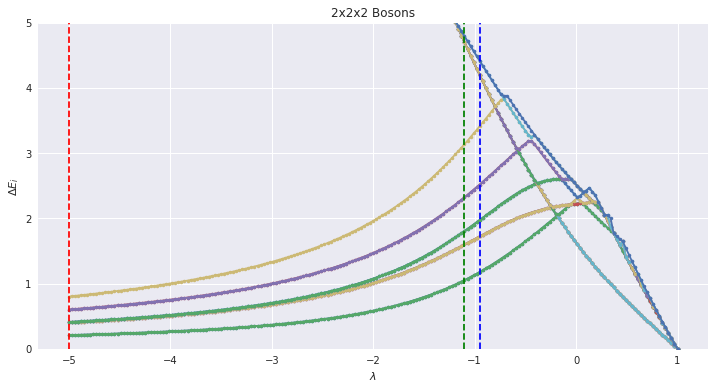

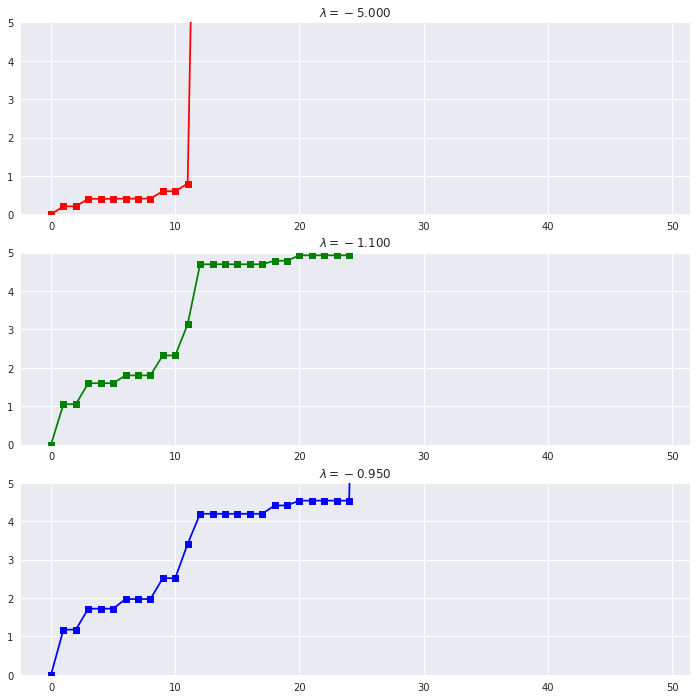

In [5]:
# Read the data.
datafile = '../python_data/multi_spectrum_bosons_2x2x2.hdf5'
lambdas, data = retrieve_spectrum_numpy(datafile)
df = retrieve_spectrum_pandas(datafile)

colors = ['red', 'green', 'blue', 'orange', 'cyan']

# Index of lambda values to display (can be as many as you want).
lam_indicies = [0, 130, 135]

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    
    
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)
    bx.set_title('2x2x2 Bosons')
    

    # -----------------------------------------------------------------------
    # Vertical cuts at constant lambda.

    # Toggls how many values to display (starting from the GS) in the detail plots.
    n_display_values = 120
    
    fig, ax = plt.subplots(len(lam_indicies),1, squeeze=False)
    fig.set_size_inches(12, len(lam_indicies)*4)
    
    for k, lam_index in enumerate(lam_indicies):
        data = df.iloc[lam_index]
        gs = data['spectrum'][0]
        ax[k,0].plot(data['spectrum'][:n_display_values]-gs, marker='s', color=colors[k])
        ax[k,0].set_title('$\\lambda = {:.3f}$'.format(data['lambda']))
        bx.axvline(data['lambda'], ls='--', color=colors[k])
        
        ax[k,0].set_ylim(0, 5)

## Fermions 2x2x2

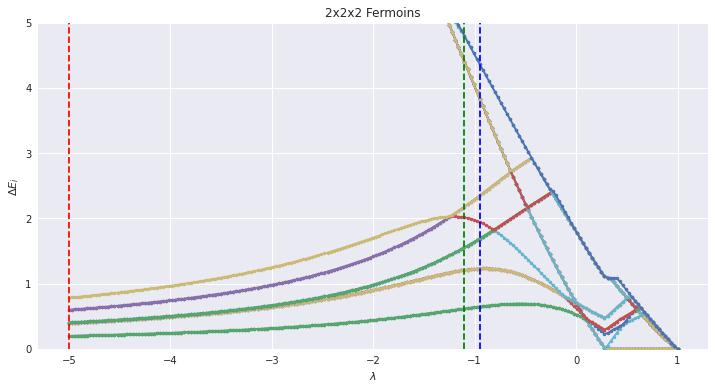

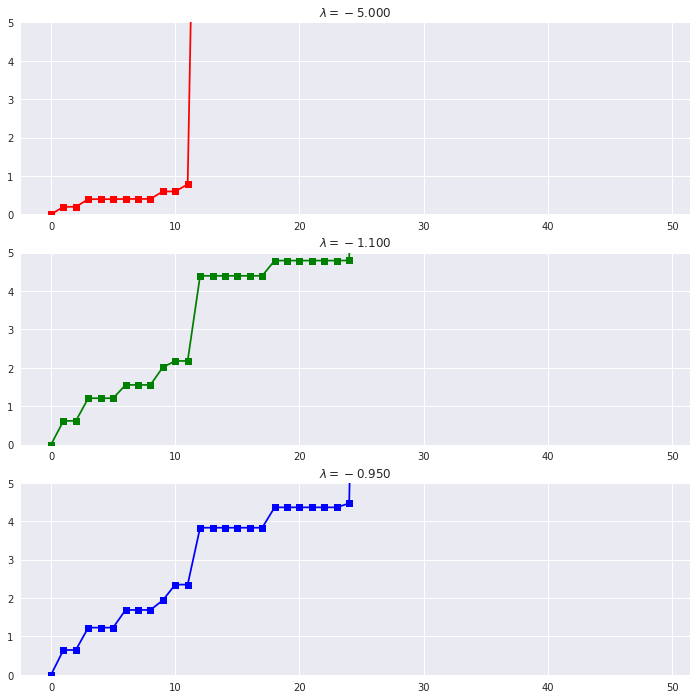

In [6]:
# Read the data.
datafile = '../python_data/multi_spectrum_fermions_2x2x2.hdf5'
lambdas, data = retrieve_spectrum_numpy(datafile)
df = retrieve_spectrum_pandas(datafile)

colors = ['red', 'green', 'blue', 'orange', 'cyan']

# Index of lambda values to display (can be as many as you want).
lam_indicies = [0, 130, 135]

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    
    
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)
    bx.set_title('2x2x2 Fermoins')
    

    # -----------------------------------------------------------------------
    # Vertical cuts at constant lambda.

    # Toggls how many values to display (starting from the GS) in the detail plots.
    n_display_values = 120
    
    fig, ax = plt.subplots(len(lam_indicies),1, squeeze=False)
    fig.set_size_inches(12, len(lam_indicies)*4)
    
    for k, lam_index in enumerate(lam_indicies):
        data = df.iloc[lam_index]
        gs = data['spectrum'][0]
        ax[k,0].plot(data['spectrum'][:n_display_values]-gs, marker='s', color=colors[k])
        ax[k,0].set_title('$\\lambda = {:.3f}$'.format(data['lambda']))
        bx.axvline(data['lambda'], ls='--', color=colors[k])
        
        ax[k,0].set_ylim(0, 5)